In [2]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import re

In [3]:
empresas = pd.read_csv('empresas_v2.csv')
infos = pd.read_csv('infos_empresas.csv')
cotacoes = pd.read_csv('cotacoes.csv')
dividendos = pd.read_csv('dividendos.csv')
indicadores = pd.read_csv('indicadores.csv')

empresas = empresas.drop(empresas.columns[0], axis=1)
infos = infos.drop(infos.columns[0], axis=1)
cotacoes = cotacoes.drop(cotacoes.columns[0], axis=1)
dividendos = dividendos.drop(dividendos.columns[0], axis=1)
indicadores = indicadores.drop(indicadores.columns[0], axis=1)

In [4]:
anos = np.arange(2015,2024)
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days=365)
anos

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [5]:
indicadores['graham'] = (indicadores['lpa'] * indicadores['vpa'] * 22.5)**1/2

In [6]:
indicadores

,ticker,cvm_code,setor,estatal,year,roe,debt_ratio,vpa,lpa,dividendo,graham
0,CMIG4,2453,energia,True,2015,0.190104,4.785397,4.538318,0.862750,1.219627,44.048642
1,CMIG4,2453,energia,True,2016,0.025881,39.342204,4.519691,0.116974,1.293778,5.947720
2,CMIG4,2453,energia,True,2017,0.069894,12.289442,5.007417,0.349990,0.487119,19.716161
3,CMIG4,2453,energia,True,2018,0.109271,7.565812,5.569721,0.608611,1.288606,38.135200
4,CMIG4,2453,energia,True,2019,0.198376,4.226188,5.626741,1.116211,1.450221,70.657100
...,...,...,...,...,...,...,...,...,...,...,...
251,TIMS3,24929,telecom,False,2018,0.079137,-1.500065,8.005929,0.633563,0.236894,57.062928
252,TIMS3,24929,telecom,False,2019,NaN,-inf,0.000000,0.000000,0.465888,0.000000
253,TIMS3,24929,telecom,False,2020,0.079529,-1.247876,9.576464,0.761602,0.549765,82.051378
254,TIMS3,24929,telecom,False,2021,NaN,inf,0.000000,0.000000,0.432831,0.000000


In [7]:
cotacao_list = []
min_52_list = []
max_52_list = []
for ticker in empresas.empresa:
    ticker = ticker + '.SA'

    acao = yf.Ticker(ticker)

    try:
        cotação_atualizada = acao.history(period="1d")["Close"].iloc[-1]
    except:
        cotação_atualizada = 0

    cotacoes_acao = yf.download(ticker, um_ano_atras, hoje)
    min_52_w = cotacoes_acao['Low'].min()
    max_52_w = cotacoes_acao['High'].max()

    cotacao_list.append(cotação_atualizada)
    min_52_list.append(min_52_w)
    max_52_list.append(max_52_w)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [8]:
empresas['cotacao'] = cotacao_list
empresas['max_52_weeks'] = max_52_list
empresas['min_52_weeks'] = min_52_list

In [9]:
multiplos = {
    'energia': {'vpa':1.5,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.8},
    'saneamento' : {'vpa':1.2,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.8},
    'banco' : {'vpa':1.5,
                'roe': 0.15,
                'pl': 10,
                'dy': 8,
                'estatal_mult': 0.7},
    'seguro' : {'vpa':1.5,
                'roe': 0.15,
                'pl': 12,
                'dy': 8,
                'estatal_mult': 0.7},
    'telecom' : {'vpa':1.5,
                'roe': 0.10,
                'pl': 10,
                'dy': 8,
                'estatal_mult': 0.7},
    'combustivel' : {'vpa':1.2,
                'roe': 0.15,
                'pl': 7,
                'dy': 8,
                'estatal_mult': 0.7}
}

In [10]:
df_list_faixas = []
for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    for ano in anos[:-1]:

        try:
            maxima = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['max'].values[0]
        except:
            print('maxima', ticker, ano)
            maxima = 0
        try:
            minima = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['min'].values[0]
        except:
            print('minima', ticker, ano)
            minima = 0
        try:
            close = cotacoes[cotacoes['ticker']==ticker][cotacoes[cotacoes['ticker']==ticker]['year']==ano+1]['close'].values[0]
        except:
            print('close', ticker, ano)
            close = 0

        lpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['lpa'].values[0]
        vpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['vpa'].values[0]
        div = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['dividendo'].values[0]

        pl_max = maxima/lpa
        pl_min = minima/lpa
        
        pvpa_max = maxima/vpa
        pvpa_min = minima/vpa

        dy_max = div/maxima
        dy_min = div/minima

        dicionario = {
            'ticker': ticker,
            'ano': ano+1,
            'max': maxima,
            'min': minima,
            'pl_max': pl_max,
            'pl_min': pl_min,
            'pvpa_max': pvpa_max,
            'pvpa_min': pvpa_min,
            'dy_max': dy_max,
            'dy_min': dy_min
        }

        df = pd.DataFrame(dicionario, index=[0])
        df_list_faixas.append(df)


maxima TAEE3 2015
minima TAEE3 2015
close TAEE3 2015
maxima TAEE4 2015
minima TAEE4 2015
close TAEE4 2015


C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  dy_max = div/maxima
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  dy_min = div/minima


maxima SAPR11 2015
minima SAPR11 2015
close SAPR11 2015


C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:32: RuntimeWarning: invalid value encountered in scalar divide
  dy_max = div/maxima
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dy_min = div/minima
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  pl_max = maxima/lpa
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  pl_min = minima/lpa
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  pvpa_max = maxima/vpa
C:\Users\eduar\AppData\Local\Temp\ipykernel_6996\3122441734.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  pvpa_min = minima/vpa


maxima WIZC3 2015
minima WIZC3 2015
close WIZC3 2015
maxima WIZC3 2016
minima WIZC3 2016
close WIZC3 2016
maxima WIZC3 2017
minima WIZC3 2017
close WIZC3 2017
maxima WIZC3 2018
minima WIZC3 2018
close WIZC3 2018
maxima WIZC3 2019
minima WIZC3 2019
close WIZC3 2019
maxima WIZC3 2020
minima WIZC3 2020
close WIZC3 2020
maxima WIZC3 2021
minima WIZC3 2021
close WIZC3 2021
maxima ENAT3 2015
minima ENAT3 2015
close ENAT3 2015
maxima ENAT3 2016
minima ENAT3 2016
close ENAT3 2016
maxima ENAT3 2017
minima ENAT3 2017
close ENAT3 2017
maxima TIMS3 2015
minima TIMS3 2015
close TIMS3 2015
maxima TIMS3 2016
minima TIMS3 2016
close TIMS3 2016
maxima TIMS3 2017
minima TIMS3 2017
close TIMS3 2017
maxima TIMS3 2018
minima TIMS3 2018
close TIMS3 2018


In [11]:
faixas_precos = pd.concat(df_list_faixas)
faixas_precos

,ticker,ano,max,min,pl_max,pl_min,pvpa_max,pvpa_min,dy_max,dy_min
0,CMIG4,2016,9.97,4.10,11.556068,4.752244,2.196849,0.903418,0.122330,0.297470
0,CMIG4,2017,12.04,5.14,102.928879,43.941399,2.663899,1.137246,0.107457,0.251708
0,CMIG4,2018,13.87,6.46,39.629666,18.457653,2.769891,1.290086,0.035120,0.075405
0,CMIG4,2019,15.74,12.20,25.862152,20.045633,2.825994,2.190415,0.081868,0.105623
0,CMIG4,2020,16.21,7.54,14.522341,6.754994,2.880886,1.340030,0.089465,0.192337
...,...,...,...,...,...,...,...,...,...,...
0,TIMS3,2019,0.00,0.00,0.000000,0.000000,0.000000,0.000000,inf,inf
0,TIMS3,2020,15.14,11.42,inf,inf,inf,inf,0.030772,0.040796
0,TIMS3,2021,14.85,11.15,19.498368,14.640188,1.550677,1.164313,0.037021,0.049306
0,TIMS3,2022,14.63,11.65,inf,inf,inf,inf,0.029585,0.037153


In [12]:
df_list_preco_teorico = []
for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    setor = empresas.iloc[i]['setor']
    estatal = empresas.iloc[i]['estatal']

    lpa_m = multiplos[setor]['pl']
    vpa_m = multiplos[setor]['vpa']
    dy_m = multiplos[setor]['dy']/100
    estatal_m = multiplos[setor]['estatal_mult']

    if estatal:
        lpa_m *= estatal_m
        vpa_m *= estatal_m
        dy_m /= estatal_m

    for ano in anos[:-1]:

        lpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['lpa'].values[0]
        vpa = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['vpa'].values[0]
        div = indicadores[indicadores['ticker']==ticker][indicadores[indicadores['ticker']==ticker]['year']==ano]['dividendo'].values[0]

        preco_lpa = lpa_m * lpa
        preco_vpa = vpa_m * vpa
        preco_dy = div/dy_m

        if vpa > preco_dy:
            preco_3_8_ajustado = (vpa - preco_dy)/2 + preco_dy
        else:
            preco_3_8_ajustado = div/0.08

        medias = [preco_lpa, preco_vpa, preco_dy]
        if preco_3_8_ajustado == preco_dy:
            pass
        else:
            medias.append(preco_3_8_ajustado)
        medias_df = pd.DataFrame()
        medias_df['precos'] = medias

        media = medias_df['precos'].mean()
        mediana = medias_df['precos'].median()

        dicionario = {
            'ticker': ticker,
            'ano': ano,
            'preco_lpa': preco_lpa,
            'preco_vpa': preco_vpa,
            'preco_dy': preco_dy,
            'preco_3_8': preco_3_8_ajustado,
            'media': media,
            'mediana': mediana
        }

        df = pd.DataFrame(dicionario, index=[0])
        df_list_preco_teorico.append(df)


In [13]:
preco_teorico = pd.concat(df_list_preco_teorico)
preco_teorico

,ticker,ano,preco_lpa,preco_vpa,preco_dy,preco_3_8,media,mediana
0,CMIG4,2015,4.831401,5.445981,12.196275,15.245343,9.429750,8.821128
0,CMIG4,2016,0.655054,5.423630,12.937778,16.172223,8.797171,9.180704
0,CMIG4,2017,1.959946,6.008901,4.871191,4.939304,4.444835,4.905248
0,CMIG4,2018,3.408224,6.683665,12.886056,16.107570,9.771379,9.784861
0,CMIG4,2019,6.250783,6.752089,14.502207,18.127758,11.408209,10.627148
...,...,...,...,...,...,...,...,...
0,TIMS3,2018,6.335630,12.008894,2.961173,5.483551,6.697312,5.909590
0,TIMS3,2019,0.000000,0.000000,5.823604,5.823604,1.941201,0.000000
0,TIMS3,2020,7.616022,14.364695,6.872057,8.224260,9.269259,7.920141
0,TIMS3,2021,0.000000,0.000000,5.410381,5.410381,1.803460,0.000000


In [14]:
fator_preco_dividendo_3_8 = 0.08

lista_dfs_preco_teto = []

for i in range(len(empresas)):
    ticker = empresas.iloc[i]['empresa']
    preco = empresas.iloc[i]['cotacao']
    max_52_w = empresas.iloc[i]['max_52_weeks']
    min_52_w = empresas.iloc[i]['min_52_weeks']

    dados_indicadores = indicadores[indicadores['ticker']==ticker]
    media_dividendos_3_anos = dados_indicadores.iloc[-3:]['dividendo'].mean()
    
    ultimo_dado_vpa = dados_indicadores.iloc[-1]['vpa']
    
    preco_3_8 = media_dividendos_3_anos/fator_preco_dividendo_3_8

    if ultimo_dado_vpa > preco_3_8:
        preco_3_8_ajustado = (ultimo_dado_vpa-preco_3_8)/2 + preco_3_8
    else:
        preco_3_8_ajustado = preco_3_8

    dados_preco_teorico = preco_teorico[preco_teorico['ticker']==ticker]
    dados_preco_teorico = dados_preco_teorico.iloc[-1]

    preco_lpa = dados_preco_teorico['preco_lpa']
    preco_vpa = dados_preco_teorico['preco_vpa']

    preco_indicadores = (preco_vpa + preco_lpa)/2
    
    preco_medio = dados_preco_teorico['media']
    preco_mediano = dados_preco_teorico['mediana']

    lista_precos_via_outros_indicadores = [preco_lpa, preco_vpa, preco_medio, preco_mediano]
    preco_teto_indicadores = min(lista_precos_via_outros_indicadores)
    
    lista_precos_teto = [preco_3_8_ajustado, preco_teto_indicadores, preco_indicadores]
    preco_teto = min(lista_precos_teto)

    dicionario = {
        'ticker': ticker,
        'preco': preco,
        'min_52_sem': min_52_w,
        'max_52_sem': max_52_w,
        'preco_teto_lpa': preco_lpa,
        'preco_teto_vpa': preco_vpa,
        'preco_medio': preco_medio,
        'preco_mediano': preco_mediano,
        'preco_medio_mediano': min([preco_mediano, preco_medio]),
        'dividendos_3_anos': media_dividendos_3_anos,
        'preco_3_8': preco_3_8_ajustado,
        'preco_indicadores': preco_indicadores,
        'preco_teto': preco_teto
    }

    preco_teto = pd.DataFrame(dicionario, index=[0])
    lista_dfs_preco_teto.append(preco_teto)


In [15]:
preco_teto = pd.concat(lista_dfs_preco_teto)
preco_teto

,ticker,preco,min_52_sem,max_52_sem,preco_teto_lpa,preco_teto_vpa,preco_medio,preco_mediano,preco_medio_mediano,dividendos_3_anos,preco_3_8,preco_indicadores,preco_teto
0,CMIG4,10.130000,8.061538,10.710000,8.011951,9.134141,21.524484,19.889703,19.889703,2.215089,27.688617,8.573046,8.011951
0,CMIG3,12.160000,10.076923,16.230768,8.011951,9.134141,21.524484,19.889703,19.889703,2.215089,27.688617,8.573046,8.011951
0,TAEE11,34.619999,33.240002,38.619999,29.447133,28.608840,80.034469,29.447133,29.447133,12.569321,157.116509,29.027986,28.608840
0,TAEE3,11.530000,11.030000,12.970000,9.815711,9.536280,26.678156,9.815711,9.815711,4.189774,52.372170,9.675995,9.536280
0,TAEE4,11.650000,11.120000,12.920000,9.815711,9.536280,26.678156,9.815711,9.815711,4.189774,52.372170,9.675995,9.536280
0,CPLE6,9.130000,7.257961,10.550000,2.157763,8.501200,12.627941,13.106778,12.627941,3.530220,44.127756,5.329481,2.157763
0,CPLE3,8.170000,6.520000,9.580000,2.157763,8.501200,11.722119,12.301603,11.722119,3.209287,40.116085,5.329481,2.157763
0,CSMG3,19.600000,15.630000,22.889999,12.420221,18.314996,11.509814,11.940471,11.509814,3.230581,40.382262,15.367609,11.509814
0,SAPR11,27.330000,19.570000,29.719999,21.335989,27.909544,37.768575,36.583387,36.583387,3.593234,44.915427,24.622767,21.335989
0,SAPR3,5.200000,3.780000,5.630000,4.267198,5.581909,7.176571,6.981439,6.981439,0.665414,8.317672,4.924553,4.267198


In [16]:
empresas

,empresa,setor,codigo_cvm,estatal,acoes_on,acoes_pn,acoes_total,equivalencia_unit,equivalencia_ticker,equivalencia_valor,cotacao,max_52_weeks,min_52_weeks
0,CMIG4,energia,2453,True,956601911,1905179984,2861781895,1,CMIG4,1.000000,10.130000,10.710000,8.061538
1,CMIG3,energia,2453,True,956601911,1905179984,2861781895,1,CMIG4,0.924145,12.160000,16.230768,10.076923
2,TAEE11,energia,20257,False,590714069,442782652,1033496721,3,TAEE11,1.000000,34.619999,38.619999,33.240002
3,TAEE3,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,11.530000,12.970000,11.030000
4,TAEE4,energia,20257,False,590714069,442782652,1033496721,1,TAEE11,0.337737,11.650000,12.920000,11.120000
5,CPLE6,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,1.000000,9.130000,10.550000,7.257961
6,CPLE3,energia,14311,True,1300347300,1682463291,2982810591,1,CPLE6,0.908667,8.170000,9.580000,6.520000
7,CSMG3,saneamento,19445,True,380253069,0,380253069,1,CSMG3,1.000000,19.600000,22.889999,15.630000
8,SAPR11,saneamento,18627,True,503735259,1007470260,1511205519,5,SAPR11,1.000000,27.330000,29.719999,19.570000
9,SAPR3,saneamento,18627,True,503735259,1007470260,1511205519,1,SAPR11,0.290275,5.200000,5.630000,3.780000


In [17]:
colunas = ['preco_medio_mediano', 'preco_3_8', 'preco_indicadores']

df_list_preco_score = []

for i in range(len(preco_teto)):
    ticker = preco_teto.iloc[i]['ticker']
    preco_atual = preco_teto.iloc[i]['preco']
    min_52_sem = preco_teto.iloc[i]['min_52_sem']
    max_52_sem = preco_teto.iloc[i]['max_52_sem']
    amplitude_52_sem = max_52_sem - min_52_sem

    setor_empresa = empresas[empresas['empresa']==ticker]['setor'].values[0]

    score_total = 0
    preco_teto_final = 0

    for coluna in colunas:
        dado_em_analise = preco_teto.iloc[i][coluna]

        distancia_dado_preco = preco_atual - dado_em_analise
        percentil_dado_preco_amplitude = distancia_dado_preco/amplitude_52_sem

        distancia_dado_minima = min_52_sem - dado_em_analise
        percentil_dado_minima_amplitude = distancia_dado_minima/amplitude_52_sem

        distancia_maxima_dado = max_52_sem - dado_em_analise
        percentil_distancia_maxima_amplitude = distancia_maxima_dado/amplitude_52_sem

        score = (percentil_dado_preco_amplitude + percentil_dado_minima_amplitude + percentil_distancia_maxima_amplitude)/3

        if score > 1:
            score = 1
        elif score < -1:
            score = -1
            
        score = round(score,2)

        score_total += score

        if dado_em_analise > preco_atual*1.5:
            dado_em_analise = preco_atual*1.5

        preco_teto_final += dado_em_analise
        
    score_total /= len(colunas)
    preco_teto_final /= len(colunas)
    if preco_teto_final > max_52_sem:
        preco_teto_final_ajustado = min_52_sem + (amplitude_52_sem/2)

    else:
        preco_teto_final_ajustado = preco_teto_final

    score_total = round(score_total, 2)
    preco_teto_final = round(preco_teto_final, 2)
    preco_atual = round(preco_atual, 2)
    min_52_sem = round(min_52_sem, 2)
    max_52_sem = round(max_52_sem, 2)
    amplitude_52_sem = round(amplitude_52_sem, 2)
    preco_teto_final_ajustado = round(preco_teto_final_ajustado, 2)
    
    dicionario = {
        'ticker': ticker,
        'setor': setor_empresa,
        'preco_atual': preco_atual,
        'min_52_sem': min_52_sem,
        'max_52_sem': max_52_sem,
        'amplitude_52_sem': amplitude_52_sem,
        'score': score_total,
        'preco_teto': preco_teto_final,
        'preco_teto_ajustado': preco_teto_final_ajustado,
        'distancia_precos': preco_atual - preco_teto_final_ajustado
    }

    df_score = pd.DataFrame(dicionario, index=[0])
    df_list_preco_score.append(df_score)   


In [18]:
score_empresas = pd.concat(df_list_preco_score)
score_empresas = score_empresas.sort_values('score')

In [19]:
graham_list = []
for empresa in score_empresas.ticker:
    lpa = indicadores[indicadores['ticker']==empresa]['lpa'].iloc[-1]
    vpa = indicadores[indicadores['ticker']==empresa]['vpa'].iloc[-1]
    estatal = indicadores[indicadores['ticker']==empresa]['estatal'].iloc[-1]
    graham = (lpa * vpa * 22.5) ** (1/2)
    if estatal:
        graham = graham*0.75
    graham = round(graham,2)
    graham_list.append(graham)

In [20]:
score_empresas['graham'] = graham_list

In [21]:
score_empresas

,ticker,setor,preco_atual,min_52_sem,max_52_sem,amplitude_52_sem,score,preco_teto,preco_teto_ajustado,distancia_precos,graham
0,ITSA3,banco,10.05,8.32,10.94,2.62,-1.00,13.19,9.63,0.42,15.12
0,SANB4,banco,15.06,13.52,17.03,3.51,-1.00,21.79,15.28,-0.22,25.20
0,SANB3,banco,13.44,12.06,15.40,3.34,-1.00,20.16,13.73,-0.29,25.20
0,SANB11,banco,28.50,25.56,32.48,6.92,-1.00,42.25,29.02,-0.52,50.40
0,BRSR3,banco,11.57,11.22,15.43,4.21,-1.00,17.35,13.33,-1.76,24.63
0,BRSR6,banco,11.14,10.40,15.73,5.33,-1.00,16.71,13.06,-1.92,24.63
0,ITSA4,banco,10.04,8.18,10.94,2.76,-0.99,13.19,9.56,0.48,15.12
0,BBAS3,banco,27.62,21.40,29.95,8.56,-0.87,34.28,25.68,1.94,43.48
0,BBDC3,banco,11.95,11.94,15.77,3.83,-0.86,16.82,13.86,-1.91,26.12
0,WIZC3,seguro,6.72,4.94,7.61,2.67,-0.84,9.31,6.28,0.44,13.68


In [22]:
filtro_final = score_empresas[score_empresas['distancia_precos']<=0].sort_values(by='distancia_precos')
filtro_final = filtro_final[filtro_final['preco_atual']<=filtro_final['graham']]
filtro_final.to_csv('resultado_final.csv')
filtro_final

,ticker,setor,preco_atual,min_52_sem,max_52_sem,amplitude_52_sem,score,preco_teto,preco_teto_ajustado,distancia_precos,graham
0,TAEE11,energia,34.62,33.24,38.62,5.38,0.33,36.80,36.80,-2.18,42.49
0,BBDC4,banco,13.37,13.18,17.74,4.56,-0.70,18.18,15.46,-2.09,26.12
0,BRSR5,banco,15.01,14.05,19.99,5.94,-0.84,21.49,17.02,-2.01,24.63
0,BRSR6,banco,11.14,10.40,15.73,5.33,-1.00,16.71,13.06,-1.92,24.63
0,BBDC3,banco,11.95,11.94,15.77,3.83,-0.86,16.82,13.86,-1.91,26.12
0,BRSR3,banco,11.57,11.22,15.43,4.21,-1.00,17.35,13.33,-1.76,24.63
0,TAEE3,energia,11.53,11.03,12.97,1.94,0.33,12.26,12.26,-0.73,14.16
0,TAEE4,energia,11.65,11.12,12.92,1.80,0.33,12.32,12.32,-0.67,14.16
0,SANB11,banco,28.50,25.56,32.48,6.92,-1.00,42.25,29.02,-0.52,50.40
0,SANB3,banco,13.44,12.06,15.40,3.34,-1.00,20.16,13.73,-0.29,25.20


In [23]:
os.chdir(r'C:\\Users\\eduar\\dev\\github')

In [24]:
filtro_final.to_csv('resultado_final.csv')

In [25]:
os.chdir(r'C:\\Users\\eduar\\dev\\github\\radar_fundamentalista')

In [26]:
def separar_ticker(ticker):
    match = re.match(r'([A-Za-z]+)(\d+)', ticker)
    if match:
        parte_textual = match.group(1)
        parte_numerica = match.group(2)
        parte_numerica = int(parte_numerica)
        return parte_textual, parte_numerica
    else:
        return None

In [27]:
empresas_filtro_final = filtro_final.ticker.unique()
empresas_filtro_final

array(['TAEE11', 'BBDC4', 'BRSR5', 'BRSR6', 'BBDC3', 'BRSR3', 'TAEE3',
       'TAEE4', 'SANB11', 'SANB3', 'SANB4'], dtype=object)

In [28]:
empresas_final_final = []
for empresa in empresas_filtro_final:
    letras_ticker = empresa[:4]
    num_ticker = empresa[4:]
    if letras_ticker == 'BRSR':
        empresas_final_final.append('BRSR6')
    elif letras_ticker == 'CPLE':
        empresas_final_final.append('CPLE6')
    else:
        if num_ticker == '11':
            empresas_final_final.append(empresa)
        elif num_ticker == '4':
            teste = letras_ticker + '11'
            if teste in empresas_filtro_final:
                pass
            else:
                empresas_final_final.append(empresa)
        elif num_ticker == '3':
            teste = letras_ticker + '11'
            if teste in empresas_filtro_final:
                pass
            else:
                teste = letras_ticker + '4'
                if teste in empresas_filtro_final:
                    pass
                else:
                    empresas_final_final.append(empresa)

In [29]:
empresas_final_final = set(empresas_final_final)

In [30]:
empresas_final_final

{'BBDC4', 'BRSR6', 'SANB11', 'TAEE11'}

In [31]:
# cias_comparador_de_tickers = {}

# for ticker in empresas_filtro_final:
#     partes = separar_ticker(ticker)
#     parte_textual, parte_numerica = partes
#     if parte_textual in cias_comparador_de_tickers.keys():
#         cias_comparador_de_tickers[parte_textual].append(parte_numerica)
#     else:
#         cias_comparador_de_tickers[parte_textual] = [parte_numerica]

# tickers_empresas_filtradas = ['IBOV']
# for k, v in cias_comparador_de_tickers.items():
#     maior_ticker = max(v)
#     ticker = k + str(maior_ticker)
#     tickers_empresas_filtradas.append(ticker)

# tickers_empresas_filtradas

In [32]:
cotacoes_empresas_filtradas = {}
for ticker in empresas_final_final:

    if ticker == 'IBOV':
        ticker_yf = '^BVSP'
    else:
        ticker_yf = ticker + '.SA'
    
    cots_yf = yf.download(ticker_yf,um_ano_atras,hoje)[['Open', 'High', 'Low', 'Close', 'Volume']]
    cotacoes_empresas_filtradas[ticker] = [cots_yf]
    
    cots_yf_semanal = cots_yf['Close'].resample('W').last()
    cots_yf_semanal = cots_yf_semanal.to_frame()
    cots_yf_semanal['High'] = cots_yf['High'].resample('W').max()
    cots_yf_semanal['Low'] = cots_yf['Low'].resample('W').min()
    cots_yf_semanal['Open'] = cots_yf['Open'].resample('W').first()
    cotacoes_empresas_filtradas[ticker].append(cots_yf_semanal)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
os.chdir(r'C:\\Users\\eduar\\dev\\github')

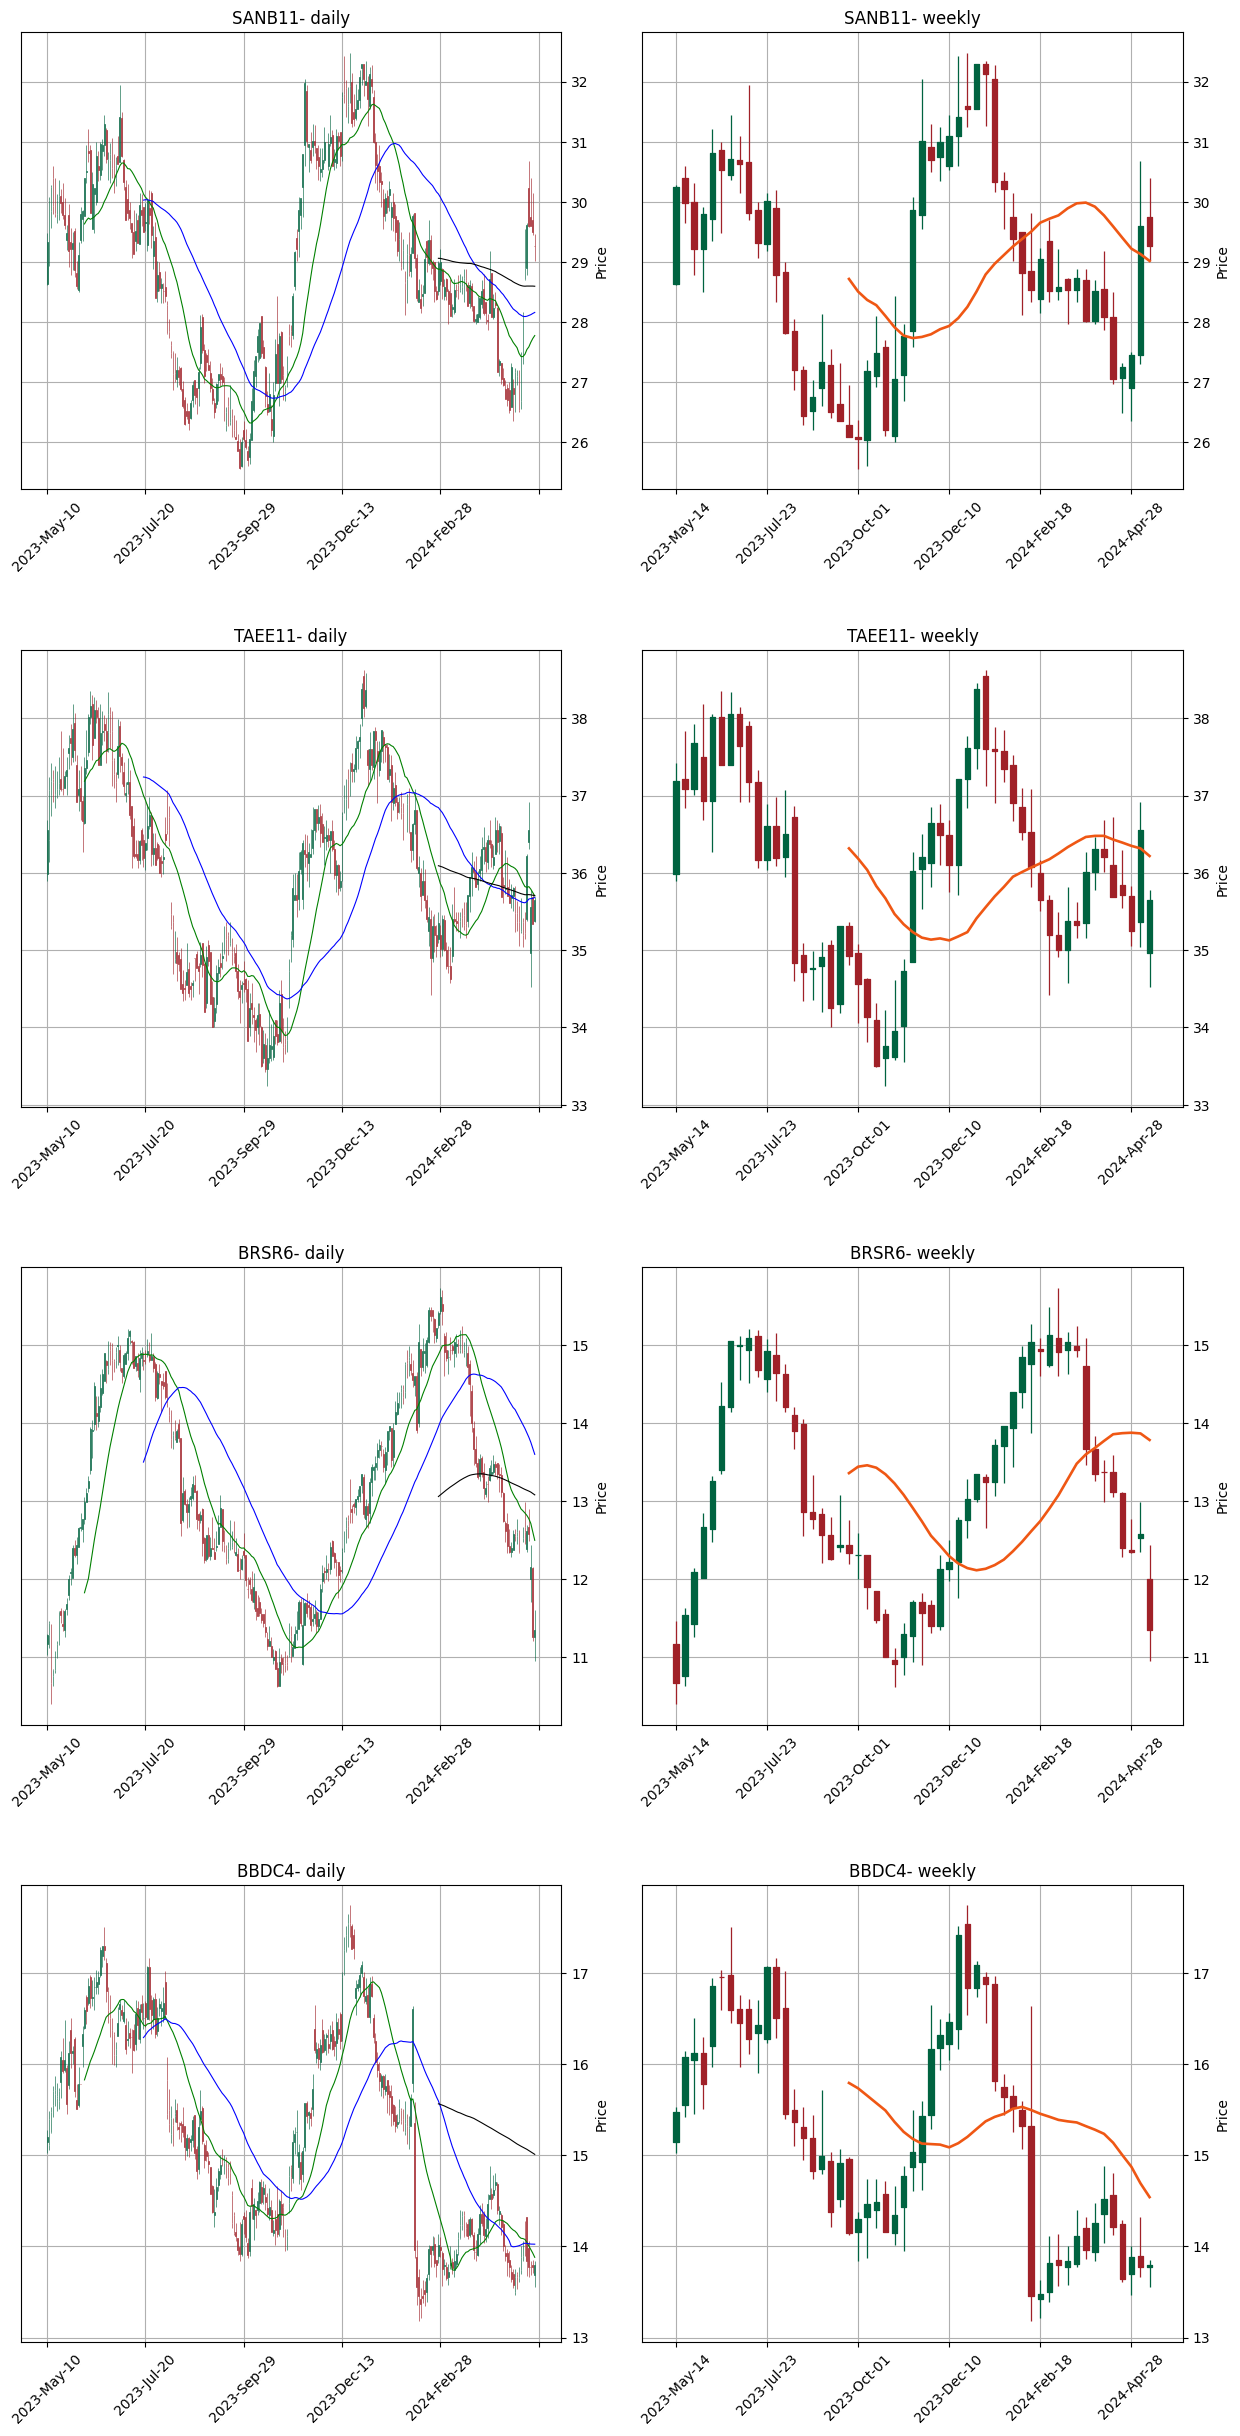

In [70]:
fig, ax = plt.subplots(ncols=2, nrows=len(empresas_final_final), figsize=(15,30))

plt.subplots_adjust(hspace=0.35, wspace=0.15)

contador = 0
for k, v in cotacoes_empresas_filtradas.items():
    mpf.plot(v[0], ax=ax[contador,0], type='candle', style='charles', volume=False, mav=(20, 50, 200), mavcolors=['green','blue','black'])
    ax[contador,0].set_title(k + '- daily')
    ax[contador,0].grid(True)

    mpf.plot(v[1], ax=ax[contador,1], type='candle', style='charles', volume=False, mav=(20))
    ax[contador,1].set_title(k + '- weekly')
    ax[contador,1].grid(True)

    contador += 1
    
plt.savefig('graficos.png')

plt.show()

In [37]:
os.chdir(r'C:\\Users\\eduar\\dev\\github\\radar_fundamentalista')

In [41]:
df_estatais = indicadores[['ticker', 'estatal']]
df_estatais = df_estatais.drop_duplicates()
df_estatais.to_csv('estatais.csv', index=False)

In [72]:
# Acrescentar indicadores qualitativos para calculo do score (ROE e razao dívida)
# Por último, criar outro código para vizualização dos preços e indicadores